# Deep-learning Lab
___

### Imports

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import random as rnd
import shutil
import cv2

rnd.seed(42)

## Ploting 10 random images

['10476', '1824', '409', '12149', '4506', '4012', '3657', '2286', '12066', '1679']


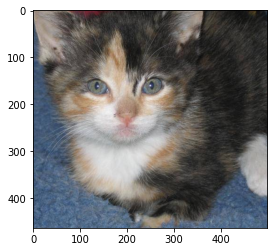

In [3]:
data_dir = os.path.abspath("../Labs/original_data/train/train")
cat_img = plt.imread(f"{data_dir}/cat.2857.jpg")

rand_cat_img = [str(rnd.randint(0, 12499)) for _ in range(5)]
rand_dog_img = [str(rnd.randint(0, 12499)) for _ in range(5)]
animal_list = rand_cat_img + rand_dog_img
print(animal_list)

plt.imshow(cat_img)

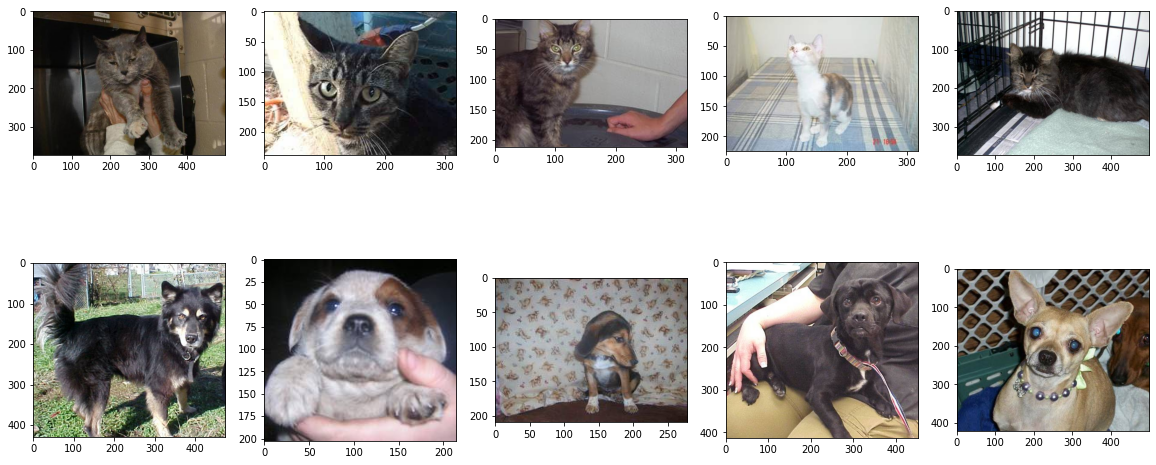

In [122]:
fig, axes = plt.subplots(2, 5, figsize = (20, 9))
    
for i, ax in enumerate(axes.flatten()):
    if i < 5:
        cat_img = plt.imread(f"{data_dir}\cat.{animal_list[i]}.jpg")
        ax.imshow(cat_img)
    else:
        dog_img = plt.imread(f"{data_dir}\dog.{animal_list[i]}.jpg")
        ax.imshow(dog_img)

## Folder creation

In [5]:
current_dir = os.path.abspath("")
print(current_dir)

child_folder_names = ["test", "train", "val"]

## Checks if the created folder already exists
try:
    os.mkdir(f"{current_dir}/experimental_small_data") ## Creats a new folder under labs
except FileExistsError as err: ## Prints error message if it already exists
    print(err)

try:
    for i in child_folder_names: ## Creats three new child forlders to the parent folder created above
        os.mkdir(f"{current_dir}/experimental_small_data/{i}")
except FileExistsError as err:
    print(err)

c:\Users\FabianAndersson-AIU2\Documents\GitHub\Deep_learning_Fabian_Andersson\Labs
[WinError 183] Det går inte att skapa en fil som redan finns: 'c:\\Users\\FabianAndersson-AIU2\\Documents\\GitHub\\Deep_learning_Fabian_Andersson\\Labs/experimental_small_data'
[WinError 183] Det går inte att skapa en fil som redan finns: 'c:\\Users\\FabianAndersson-AIU2\\Documents\\GitHub\\Deep_learning_Fabian_Andersson\\Labs/experimental_small_data/test'


In [6]:
cat_train_index = []
dog_train_index = []
cat_test_index = []
dog_test_index = []
cat_val_index = []
dog_val_index = []

image_numbers = []

while len(image_numbers) < 2500:
    rand_numbers = [str(rnd.randint(0, 12499)) for _ in range(2500 - len(image_numbers))]
    [image_numbers.append(item) for item in rand_numbers if item not in image_numbers]

for i, item in enumerate(image_numbers):
    if i < 800:
        cat_train_index.append(item)

    if i >= 800 and i < 1600:
        dog_train_index.append(item)

    if i >= 1600 and i < 1800:
        cat_test_index.append(item)

    if i >= 1800 and i < 2000:
        dog_test_index.append(item)

    if i >= 2000 and i < 2250:
        cat_val_index.append(item)

    if i >= 2250 and i < 2500:
        dog_val_index.append(item)    
    
print(len(image_numbers))
print(len(cat_train_index))
print(len(dog_train_index))
print(len(cat_test_index))
print(len(dog_test_index))
print(len(cat_val_index))
print(len(dog_val_index))

2500
800
800
200
200
250
250


In [7]:
## Creats paths for folders
train_data_dir = os.path.abspath("../Labs/original_data/train/train") 
test_data_dir = os.path.abspath("../Labs/original_data/test/test")
experiment_train_data_dir = os.path.abspath("../Labs/experimental_small_data/train")
experiment_test_data_dir = os.path.abspath("../Labs/experimental_small_data/test")
experiment_val_data_dir = os.path.abspath("../Labs/experimental_small_data/val")

def image_mover(image_list, source_path, target_path, animal):
    """Moves pictures from source path to target path based on items in image list"""
    for item in image_list:
        shutil.copyfile(f"{source_path}/{animal}.{item}.jpg", f"{target_path}/{animal}.{item}.jpg")

def test_image_mover(image_list, source_path, target_path):
    for item in image_list:
        shutil.copyfile(f"{source_path}/{item}.jpg", f"{target_path}/{item}.jpg")

image_mover(cat_train_index, train_data_dir, experiment_train_data_dir, "cat")
image_mover(dog_train_index, train_data_dir, experiment_train_data_dir, "dog")
test_image_mover(cat_test_index, test_data_dir, experiment_test_data_dir)
test_image_mover(dog_test_index, test_data_dir, experiment_test_data_dir)
image_mover(cat_val_index, train_data_dir, experiment_val_data_dir, "cat")
image_mover(dog_val_index, train_data_dir, experiment_val_data_dir, "dog")

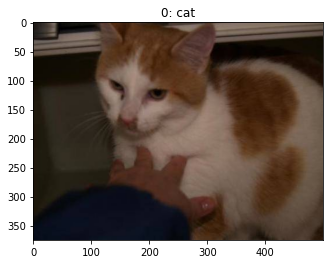

In [166]:
y = []
labels = []
train_files = []
train_imgs = []

train_files = os.listdir(experiment_train_data_dir)
rnd.shuffle(train_files)

[labels.append(i[:3]) for i in train_files]
y = np.array([0 if i == "cat" else 1 for i in labels])

for item in train_files:
    img = plt.imread(f"{experiment_train_data_dir}/{item}")
    train_imgs.append(img)

plt.imshow(train_imgs[0])
plt.title(f"{y[0]}: {labels[0]}");

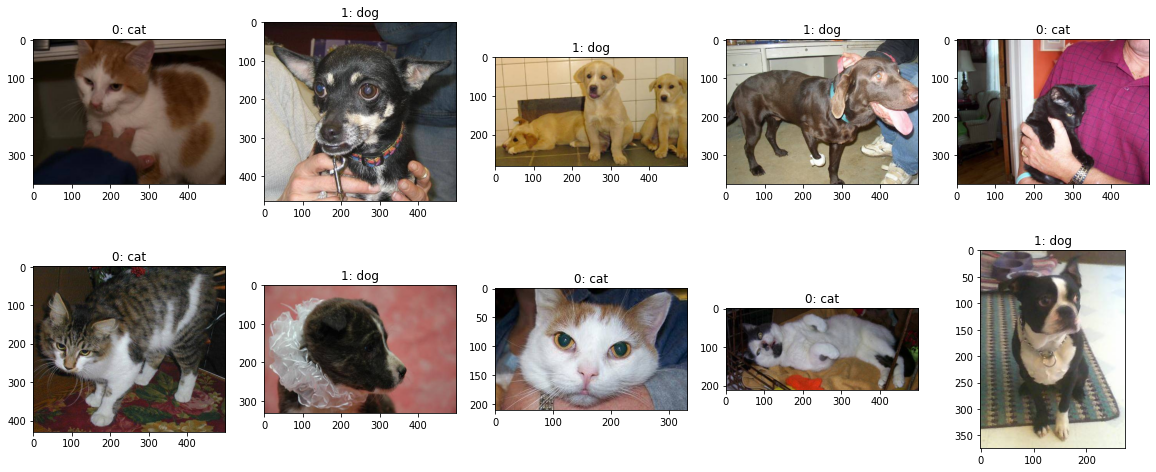

In [169]:
fig, axes = plt.subplots(2,5, figsize = (20,8))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(train_imgs[i])
    ax.set(title = (f"{y[i]}: {labels[i]}"))

<AxesSubplot:ylabel='Count'>

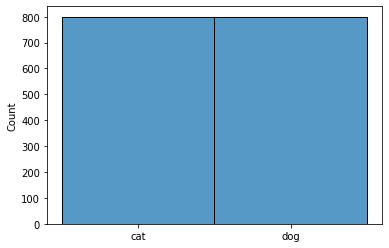

In [171]:
sns.histplot(labels)